In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import folium
import branca.colormap as cm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import webbrowser
import math

In [2]:
stdout = sys.stdout

In [3]:
#house = pd.read_csv("train.csv")
house = pd.read_csv("train.csv",keep_default_na = False, na_values = ['','nan','Null','NULL'])
house.shape

(1460, 81)

### Data processing

Missing Value

In [4]:
#LotFrontage 0
house['LotFrontage'] = house['LotFrontage'].replace('NA',0)
#MasVnrArea 0
house['MasVnrArea'] = house['MasVnrArea'].replace('NA',0)
#GarageYrBlt 0
house['GarageYrBlt'] = house['GarageYrBlt'].replace('NA',0)

In [5]:
#Electrical
house['Electrical'].value_counts()
house['Electrical'] = house['Electrical'].replace('NA','SBrkr')

#### EDA_Catigorical

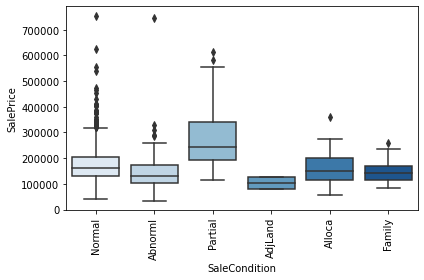

In [6]:
SaleCondition_box=sns.boxplot(x='SaleCondition', y='SalePrice', data=house, palette='Blues')
plt.setp(SaleCondition_box.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

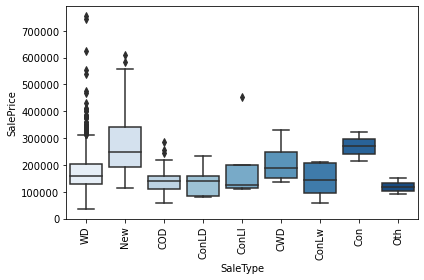

In [7]:
SaleType_box=sns.boxplot(x='SaleType', y='SalePrice', data=house, palette='Blues')
plt.setp(SaleType_box.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

In [8]:
#Foundation

In [9]:
#1. order
#ExterQual
house['ExterQual'] = house['ExterQual'].replace('Po',1)
house['ExterQual'] = house['ExterQual'].replace('Fa',2)
house['ExterQual'] = house['ExterQual'].replace('TA',3)
house['ExterQual'] = house['ExterQual'].replace('Gd',4)
house['ExterQual'] = house['ExterQual'].replace('Ex',5)
#ExterCond
house['ExterCond'] = house['ExterCond'].replace('Po',1)
house['ExterCond'] = house['ExterCond'].replace('Fa',2)
house['ExterCond'] = house['ExterCond'].replace('TA',3)
house['ExterCond'] = house['ExterCond'].replace('Gd',4)
house['ExterCond'] = house['ExterCond'].replace('Ex',5)
#BsmtQual
house['BsmtQual'] = house['BsmtQual'].replace('NA',0)
house['BsmtQual'] = house['BsmtQual'].replace('Po',1)
house['BsmtQual'] = house['BsmtQual'].replace('Fa',2)
house['BsmtQual'] = house['BsmtQual'].replace('TA',3)
house['BsmtQual'] = house['BsmtQual'].replace('Gd',4)
house['BsmtQual'] = house['BsmtQual'].replace('Ex',5)
#BsmtCond
house['BsmtCond'] = house['BsmtCond'].replace('NA',0)
house['BsmtCond'] = house['BsmtCond'].replace('Po',1)
house['BsmtCond'] = house['BsmtCond'].replace('Fa',2)
house['BsmtCond'] = house['BsmtCond'].replace('TA',3)
house['BsmtCond'] = house['BsmtCond'].replace('Gd',4)
house['BsmtCond'] = house['BsmtCond'].replace('Ex',5)
#BsmtExposure NA and No .value_counts check
house['BsmtExposure'] = house['BsmtExposure'].replace('NA',0)
house['BsmtExposure'] = house['BsmtExposure'].replace('No',1)
house['BsmtExposure'] = house['BsmtExposure'].replace('Mn',2)
house['BsmtExposure'] = house['BsmtExposure'].replace('Av',3)
house['BsmtExposure'] = house['BsmtExposure'].replace('Gd',4)
#HeatingQC 
house['HeatingQC'] = house['HeatingQC'].replace('Po',1)
house['HeatingQC'] = house['HeatingQC'].replace('Fa',2)
house['HeatingQC'] = house['HeatingQC'].replace('TA',3)
house['HeatingQC'] = house['HeatingQC'].replace('Gd',4)
house['HeatingQC'] = house['HeatingQC'].replace('Ex',5)
#CentralAir
house['CentralAir'] = house['CentralAir'].replace("N",0)
house['CentralAir'] = house['CentralAir'].replace("Y",1)
#KitchenQual
house['KitchenQual'] = house['KitchenQual'].replace('Po',1)
house['KitchenQual'] = house['KitchenQual'].replace('Fa',2)
house['KitchenQual'] = house['KitchenQual'].replace('TA',3)
house['KitchenQual'] = house['KitchenQual'].replace('Gd',4)
house['KitchenQual'] = house['KitchenQual'].replace('Ex',5)
#FireplaceQu
house['FireplaceQu'] = house['FireplaceQu'].replace('NA',0)
house['FireplaceQu'] = house['FireplaceQu'].replace('Po',1)
house['FireplaceQu'] = house['FireplaceQu'].replace('Fa',2)
house['FireplaceQu'] = house['FireplaceQu'].replace('TA',3)
house['FireplaceQu'] = house['FireplaceQu'].replace('Gd',4)
house['FireplaceQu'] = house['FireplaceQu'].replace('Ex',5)
#GarageQual
house['GarageQual'] = house['GarageQual'].replace('NA',0)
house['GarageQual'] = house['GarageQual'].replace('Po',1)
house['GarageQual'] = house['GarageQual'].replace('Fa',2)
house['GarageQual'] = house['GarageQual'].replace('TA',3)
house['GarageQual'] = house['GarageQual'].replace('Gd',4)
house['GarageQual'] = house['GarageQual'].replace('Ex',5)
#GarageCond
house['GarageCond'] = house['GarageCond'].replace('NA',0)
house['GarageCond'] = house['GarageCond'].replace('Po',1)
house['GarageCond'] = house['GarageCond'].replace('Fa',2)
house['GarageCond'] = house['GarageCond'].replace('TA',3)
house['GarageCond'] = house['GarageCond'].replace('Gd',4)
house['GarageCond'] = house['GarageCond'].replace('Ex',5)
#PoolQC
house['PoolQC'] = house['PoolQC'].replace('NA',0)
house['PoolQC'] = house['PoolQC'].replace('Fa',2)
house['PoolQC'] = house['PoolQC'].replace('TA',3)
house['PoolQC'] = house['PoolQC'].replace('Gd',4)
house['PoolQC'] = house['PoolQC'].replace('Ex',5)



In [10]:
cat = house[['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig',
      'LandSlope','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
      'Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtFinType1','BsmtFinType2',
      'Heating','Electrical','Functional','GarageType','GarageFinish','PavedDrive','Fence',
      'MiscFeature','SaleType','SaleCondition']]

enco = OneHotEncoder(sparse = False)
cat_hot = enco.fit_transform(cat)
cat_hot_df = pd.DataFrame(cat_hot)
cat_hot_df.columns = enco.get_feature_names()
cat = cat.join(cat_hot_df)
cat = cat.drop(['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig',
      'LandSlope','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
      'Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtFinType1','BsmtFinType2',
      'Heating','Electrical','Functional','GarageType','GarageFinish','PavedDrive',
      'Fence','MiscFeature','SaleType','SaleCondition'],axis = 1)

house = house.join(cat)

In [11]:
house['LotFrontage'] = house['LotFrontage'].apply(int)
house['MasVnrArea'] = house['MasVnrArea'].apply(int)

Neighborhood

In [12]:
house["Latitude"] = house.Neighborhood.replace({'Blmngtn' : 42.062806,'Blueste' : 42.009408,'BrDale' : 42.052500,'BrkSide': 42.033590,'ClearCr': 42.025425,
                                                'CollgCr': 42.021051,'Crawfor': 42.025949,'Edwards': 42.022800,'Gilbert': 42.027885,'IDOTRR' : 42.019208,
                                                'MeadowV': 41.991866,'Mitchel': 42.031307,'NAmes': 42.042966,'NoRidge': 42.050307,'NPkVill': 42.050207,
                                                'NridgHt': 42.060356,'NWAmes' : 42.051321,'OldTown': 42.028863,'Sawyer' : 42.033611,'SawyerW': 42.035540,
                                                'Somerst': 42.052191,'StoneBr': 42.060752,'SWISU'  : 42.017578,'Timber' : 41.998132,'Veenker': 42.040106})

house["Longitude"] = house.Neighborhood.replace({'Blmngtn' : -93.639963,'Blueste': -93.645543,'BrDale': -93.628821,'BrkSide': -93.627552,'ClearCr': -93.675741,
                                                'CollgCr': -93.685643,'Crawfor': -93.620215,'Edwards': -93.663040,'Gilbert': -93.615692,'IDOTRR' : -93.623401,
                                                'MeadowV': -93.602441,'Mitchel': -93.626967,'NAmes': -93.613556,'NoRidge': -93.656045,'NPkVill': -93.625827,
                                                'NridgHt': -93.657107,'NWAmes' : -93.633798,'OldTown': -93.615497,'Sawyer' : -93.669348,'SawyerW': -93.685131,
                                                'Somerst': -93.643479,'StoneBr': -93.628955,'SWISU'  : -93.651283,'Timber' : -93.648335,'Veenker': -93.657032})

### EDA_Data Insights

#### Data Combination

In [13]:
#Replace YearBuilt with BuildingDuration
house['BuildingDuration'] = house['YearBuilt'].apply(lambda x: 2021-x)
house['YearsAfterRemodel'] = house['YearRemodAdd'].apply(lambda x: 2021-x)

#Total Floor Squre Feet
house['FlrSF'] = house['1stFlrSF']+house['2ndFlrSF']

#Total Living Area
house['TotalArea'] = house['GrLivArea']+house['TotalBsmtSF']

#Totle Bathroom number
house['TotalBath'] = house['BsmtFullBath']+house['FullBath']+0.5*(house['BsmtHalfBath']+house['HalfBath'])

#Overall Grade
house['OverallG'] = house['OverallQual']+house['OverallCond']

#Exterior grade
house['ExterGrade'] = house['ExterQual']+house['ExterCond']

#Basement Grade
house['BsmtG'] = house['BsmtQual']+house['BsmtCond']+house['BsmtExposure']

#Facilities rating
house['FacilityG'] = house['FireplaceQu']+house['GarageQual']+house['GarageCond']+house['PoolQC']

In [14]:
house = house.drop(['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig',
                    'LandSlope','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
                    'Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtFinType1','BsmtFinType2',
                    'Heating','Electrical','Functional','GarageType','GarageFinish','PavedDrive',
                    'Fence','MiscFeature','SaleType','SaleCondition','Neighborhood','YearBuilt',
                    'YearRemodAdd','1stFlrSF','2ndFlrSF','Id','GrLivArea','TotalBsmtSF',
                   'BsmtFullBath','FullBath','BsmtHalfBath','HalfBath',
                   'OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond',
                   'BsmtExposure','FireplaceQu','GarageQual','GarageCond','PoolQC', 'Neighborhood'],axis = 1)

#### Plotting

Correlation

In [15]:
corr = house.corr()['SalePrice'].sort_values(ascending = False)
print(corr)

SalePrice            1.000000
TotalArea            0.778959
FlrSF                0.716883
KitchenQual          0.659600
GarageCars           0.640409
                       ...   
x23_Detchd          -0.354141
x16_None            -0.374468
x24_Unf             -0.410608
YearsAfterRemodel   -0.507101
BuildingDuration    -0.522897
Name: SalePrice, Length: 223, dtype: float64


array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotalArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='FlrSF', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='TotalArea'>,
        <AxesSubplot:xlabel='TotalArea', ylabel='TotalArea'>,
        <AxesSubplot:xlabel='FlrSF', ylabel='TotalArea'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='FlrSF'>,
        <AxesSubplot:xlabel='TotalArea', ylabel='FlrSF'>,
        <AxesSubplot:xlabel='FlrSF', ylabel='FlrSF'>]], dtype=object)

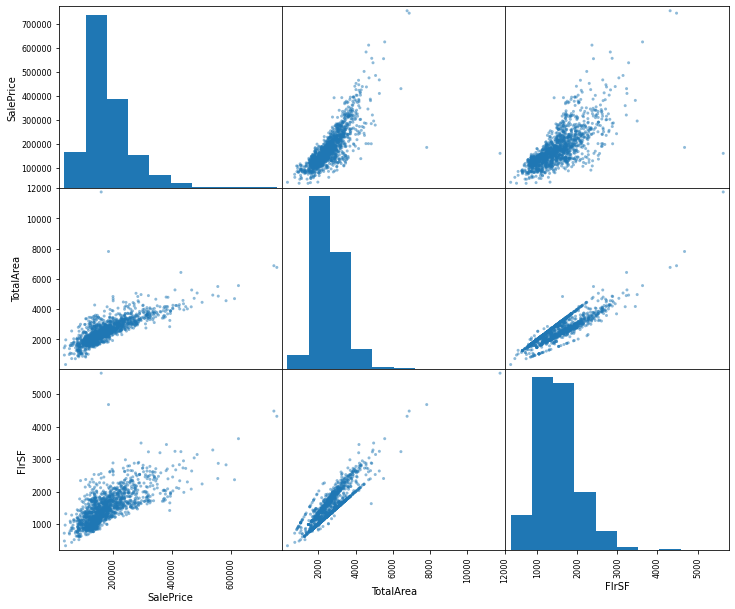

In [16]:
attr_1 = ['SalePrice','TotalArea','FlrSF']
scatter_matrix(house[attr_1],figsize=(12,10))

Target

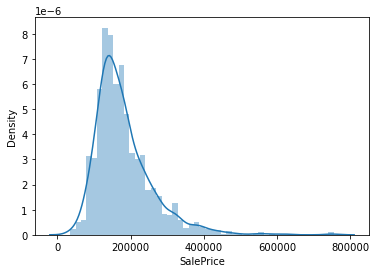

count      1460.0
mean     180921.0
std       79443.0
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

In [17]:
sns.distplot(house['SalePrice'])
plt.show()
house['SalePrice'].describe().round(0)

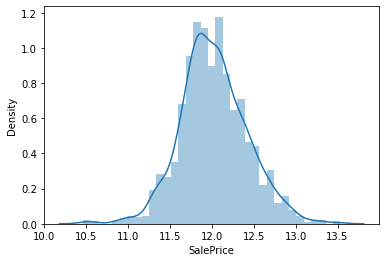

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [18]:
price=house['SalePrice']
log_price=np.log1p(price)
sns.distplot(log_price)
plt.show()
log_price.describe()

In [19]:
Geo = ({'Name':['Blmngtn','Blueste','BrDale','BrkSide','ClearCr','CollgCr',
                'Crawfor','Edwards','Gilbert','IDOTRR','MeadowV','Mitchel',
                'NAmes','NoRidge','NPkVill','NridgHt','NWAmes','OldTown',
                'Sawyer','SawyerW','Somerst','StoneBr','SWISU','Timber','Veenker'],
        'Latitude':[42.062806,42.009408,42.052500,42.033590,42.025425,42.021051,42.025949,42.022800,
                    42.027885,42.019208,41.991866,42.031307,42.042966,42.050307,42.050207,42.060356,
                    42.051321,42.028863,42.033611,42.035540,42.052191,42.060752,42.017578,41.998132,42.040106],
        
        'Longitude':[-93.639963,-93.645543,-93.628821,-93.627552,-93.675741,-93.685643,-93.620215,
                     -93.663040,-93.615692,-93.623401,-93.602441,-93.626967,-93.613556,-93.656045,
                     -93.625827,-93.657107,-93.633798,-93.615497,-93.669348,-93.685131,-93.643479,
                     -93.628955,-93.651283,-93.648335,-93.657032],
        
        'MeanPrice':[194870.882353,137500.000000,104493.750000,124834.051724,212565.428571,197965.773333,
                     210624.725490,128219.700000,192854.506329,100123.783784,98576.470588,156270.12244,
                     145847.080000,142694.444444,189050.068493,335295.317073,316270.623377,128225.300885,
                     142591.360000,136793.135135,186555.796610,225379.837209,310499.000000,242247.447368,
                     238772.727273],
        'SaleAmount':[17,2,16,58,28,150,51,100,79,37,17,49,225,41,9,77,73,113,74,59,86,25,25,38,11]
       })

Geo = pd.DataFrame(Geo)

In [20]:
Geo['MeanPriceScale'] = pd.DataFrame(Geo['MeanPrice']/1000).round(0)

m=folium.Map(location=[42.03359,-93.627552],zoom_start=13)
colormap = cm.LinearColormap(colors=['lightcoral','darkred'], index=[90,400],vmin=90,vmax=400)

for i,j,k,b,p in zip(Geo['Latitude'],Geo['Longitude'],Geo['Name'],Geo['SaleAmount'],Geo['MeanPriceScale']):
    folium.Marker([i,j],popup='<b>'+str(k)+'</b>').add_to(m)
    folium.Circle(location=[i,j],radius=10*b,color=colormap(p),popup='popup',fill=False).add_to(m)

m.add_child(colormap)

#m.save("geomap.html")
m

X_Y_split

In [21]:
Y = house['SalePrice'].values.reshape(-1,1)
logY = np.log(Y)
X = house.drop(['SalePrice'], axis=1)

In [22]:
X.shape

(1460, 223)

In [23]:
Sc = StandardScaler()
X = Sc.fit_transform(X)

Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, logY_train,logY_test = train_test_split(X,logY,train_size=0.8,random_state=20,shuffle = True)

### Model fitting

In [25]:
# OLS  
ols = linear_model.LinearRegression()
ols.fit(X_train,logY_train)
pre_ols = ols.predict(X_test)
y_pre_ols = np.exp(pre_ols)
y_pre_ols[~np.isfinite(y_pre_ols)] = 0
#print(round(math.sqrt(mean_squared_error(np.exp(logY_test), np.exp(pre_ols))),4))
stdout.write('The RMSE of OLS regression model is: '+ str(round(math.sqrt(mean_squared_error(np.exp(logY_test), y_pre_ols)),2))+'\n')
stdout.write('The R^2 of OLS regression model is: '+ str(round(r2_score(np.exp(logY_test), y_pre_ols),2))+'\n')

adj_r_ols = 1-(1-r2_score(np.exp(logY_test), y_pre_ols))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))
stdout.write('The Adjusted R^2 of OLS regression model is: '+ str(round(adj_r_ols,2))+'\n')


The RMSE of OLS regression model is: 24004.99
The R^2 of OLS regression model is: 0.92
The Adjusted R^2 of OLS regression model is: 0.64


In [26]:
#ols.fit(x_train,y_train)
#pre = ols.predict(x_test)
#print(math.sqrt(mean_squared_error(y_test, pre)))

In [27]:
# Ridge 20522.567066253854
from sklearn.model_selection import GridSearchCV
r = linear_model.Ridge()
ridge = GridSearchCV(r, {"alpha": np.arange(0,1,0.05)}, cv=10, return_train_score=True)
ridge.fit(X_train,logY_train)
pre_ridge = ridge.predict(X_test)
y_pre_ridge = np.exp(pre_ridge)
y_pre_ridge[~np.isfinite(y_pre_ridge)] = 0
#print(round(math.sqrt(mean_squared_error(np.exp(logY_test), np.exp(pre_ridge))),4))
stdout.write('The RMSE of Ridge regression model is: '+ str(round(math.sqrt(mean_squared_error(np.exp(logY_test), y_pre_ridge)),2))+'\n')
stdout.write('The R^2 of Ridge regression model is: '+ str(round(r2_score(np.exp(logY_test), y_pre_ridge),2))+'\n')

adj_r_ridge = 1-(1-r2_score(np.exp(logY_test), y_pre_ridge))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))
stdout.write('The Adjusted R^2 of Ridge regression model is: '+ str(round(adj_r_ridge,2))+'\n')

The RMSE of Ridge regression model is: 20526.96
The R^2 of Ridge regression model is: 0.94
The Adjusted R^2 of Ridge regression model is: 0.74


Text(0, 0.5, 'MSE')

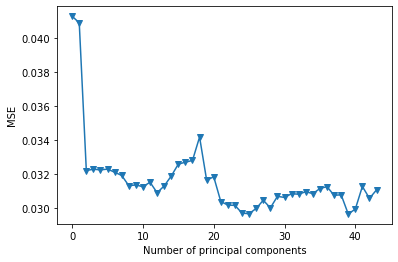

In [28]:
# PCA
from sklearn.decomposition import PCA
from sklearn import model_selection
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
n = len(X_train_pca)
kf = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 20)
mse_error = []

score = -1*model_selection.cross_val_score(ols, np.ones((n, 1)), logY_train.ravel(), cv = kf, scoring = 'neg_mean_squared_error').mean()
for i in np.arange(1, 45):
    score = -1*model_selection.cross_val_score(ols, X_train_pca[:,:i], logY_train.ravel(), cv = kf, scoring = 'neg_mean_squared_error').mean()
    mse_error.append(score)


plt.plot(np.array(mse_error),'-v')
plt.xlabel('Number of principal components')
plt.ylabel('MSE')

In [29]:
pca1 = PCA(n_components = 39)
X_train_pca_n = pca1.fit_transform(X_train)
X_test_pca_n = pca1.transform(X_test)
ols.fit(X_train_pca_n, logY_train)
pre_pcr = ols.predict(X_test_pca_n)

y_pre_pcr = np.exp(pre_pcr)
y_pre_pcr[~np.isfinite(y_pre_pcr)] = 0
#print(round(math.sqrt(mean_squared_error(np.exp(logY_test), np.exp(pre_pcr))),4))
stdout.write('The RMSE of PCA regression model is: '+ str(round(math.sqrt(mean_squared_error(np.exp(logY_test), y_pre_pcr)),2))+'\n')
stdout.write('The R^2 of PCA regression model is: '+ str(round(r2_score(np.exp(logY_test), y_pre_pcr),2))+'\n')

adj_r_pca = 1-(1-r2_score(np.exp(logY_test), y_pre_pcr))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))
stdout.write('The Adjusted R^2 of PCA regression model is: '+ str(round(adj_r_pca,2))+'\n')

The RMSE of PCA regression model is: 33545.79
The R^2 of PCA regression model is: 0.84
The Adjusted R^2 of PCA regression model is: 0.3


In [30]:
# Elastic-Net 22885.71619848781
ela = linear_model.ElasticNetCV(cv=10, random_state=20)
#elastic = GridSearchCV(ela, {"alpha": np.arange(0,1,0.05)}, return_train_score=True)
ela.fit(X_train,logY_train)
pre_elastic = ela.predict(X_test)

y_pre_elastic = np.exp(pre_elastic)
y_pre_elastic[~np.isfinite(y_pre_elastic)] = 0
#print(round(math.sqrt(mean_squared_error(np.exp(logY_test), y_pre_elastic)),4))
stdout.write('The RMSE of Elastic-Net regression model is: '+ str(round(math.sqrt(mean_squared_error(np.exp(logY_test), np.exp(pre_elastic))),2))+'\n')
stdout.write('The R^2 of Elastic-Net regression model is: '+ str(round(r2_score(np.exp(logY_test), np.exp(pre_elastic)),2))+'\n')
adj_r_en = 1-(1-r2_score(np.exp(logY_test), np.exp(pre_elastic)))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))
stdout.write('The Adjusted R^2 of Elastic-Net regression model is: '+ str(round(adj_r_en,2))+'\n')


The RMSE of Elastic-Net regression model is: 22891.56
The R^2 of Elastic-Net regression model is: 0.92
The Adjusted R^2 of Elastic-Net regression model is: 0.67
